In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.sps as sps
import lbg_forecast.popmodel as pop
import lbg_forecast.sfh as sfh
import lbg_forecast.igm as igm
import lbg_forecast.distributions as dstr
import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools

In [4]:
test_model = sps.initialise_sps_model()
test_model.libraries

(b'mist', b'miles', b'DL07')

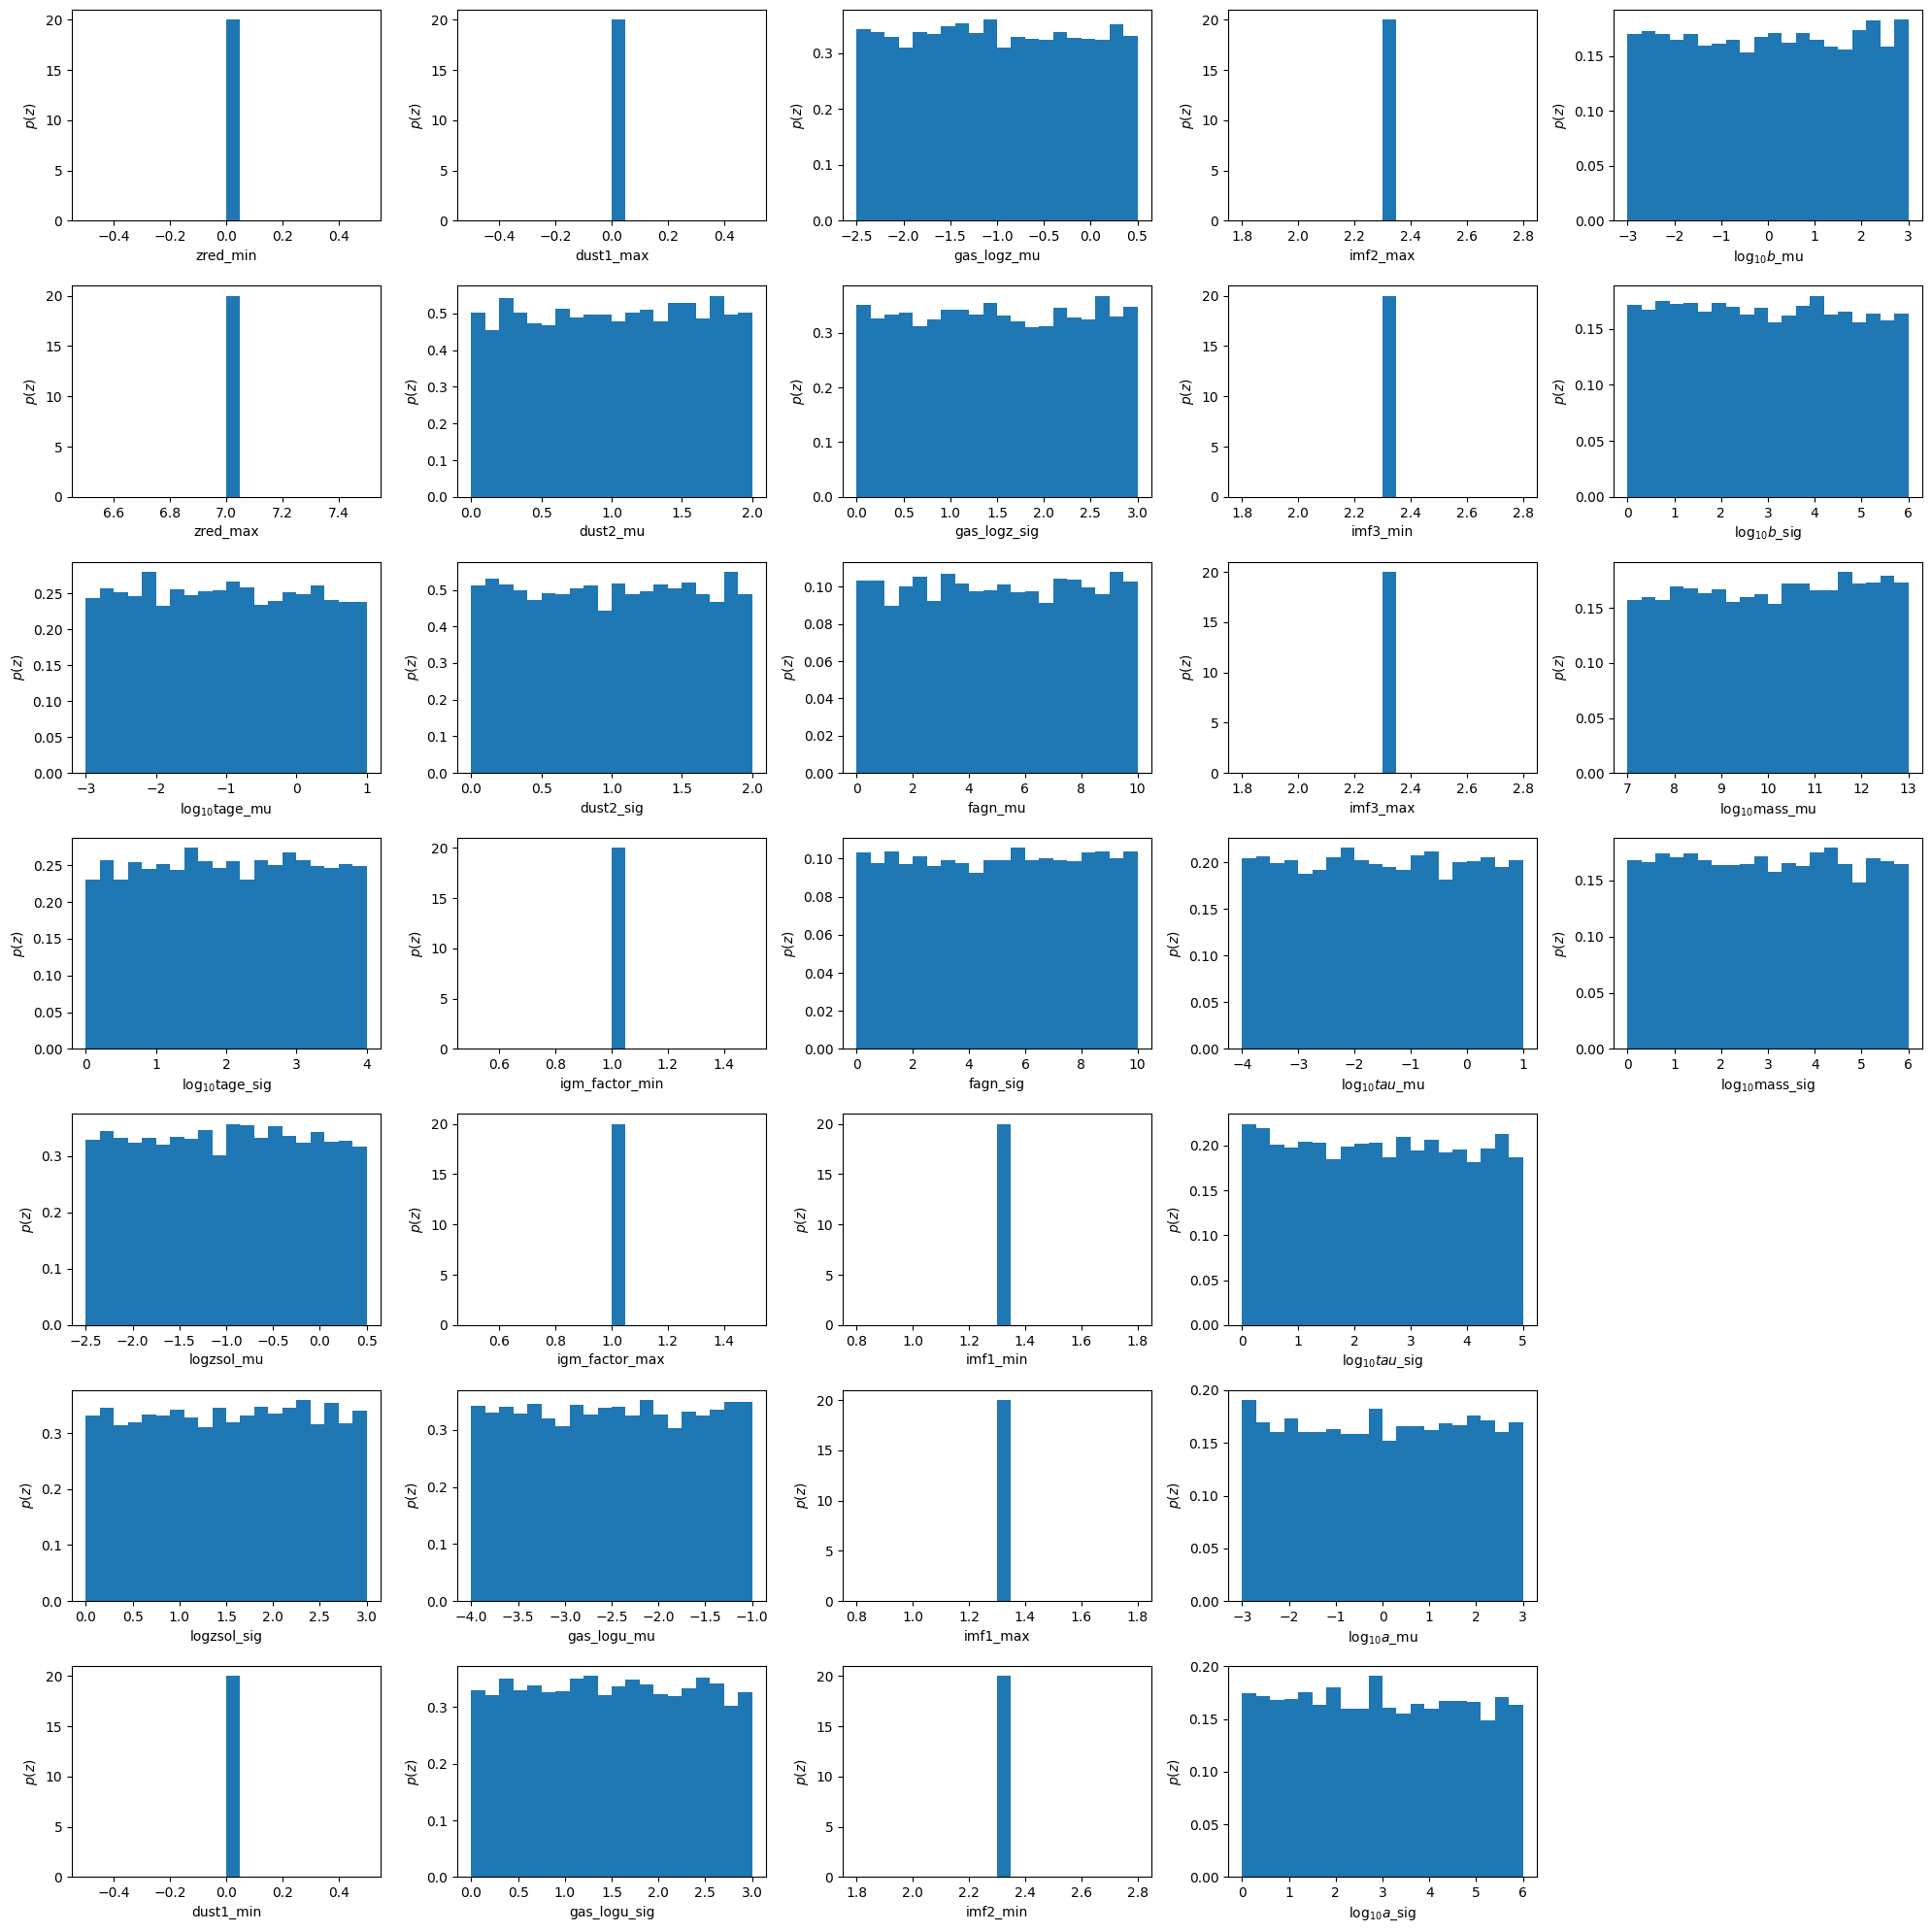

In [3]:
hyp.plot_hyperparameters(10000, hyp.define_hyperparameter_bounds(), rows=7, nbins=20)

In [4]:
data = tools.simulate_sample_photometry_dpl(1)
print(data)

[array([[35.37673052, 31.55455561, 30.38972299, 28.44262745, 26.84149053,
        26.18849066]]), array([[ 3.71966626,  0.75841483, -1.89923757,  0.        ,  0.01905696,
         1.        , -1.22764416, -0.55983301,  5.11635031,  1.3       ,
         2.3       ,  2.3       , -0.16833335,  0.74461601, -1.8463635 ,
        11.63841084]]), array([[array([0., 0., 7.]), 0.0, 7.0],
       [array([ 1., -3.,  1.]), 0.7384835371054845, 2.517235745606194],
       [array([ 1. , -2.5,  0.5]), 0.03104577777275841,
        1.950056347634332],
       [array([0., 0., 0.]), 0.0, 0.0],
       [array([1., 0., 2.]), 0.43695603535383776, 0.8986299294535528],
       [array([0., 1., 1.]), 1.0, 1.0],
       [array([ 1., -4., -1.]), -1.4812271413169635, 1.4384623583572782],
       [array([ 1. , -2.5,  0.5]), 0.4665026622910249,
        1.4472891967426136],
       [array([ 1.,  0., 10.]), 3.7301013230357807, 7.090781332574607],
       [array([0. , 1.3, 1.3]), 1.3, 1.3],
       [array([0. , 2.3, 2.3]), 2.3, 2.

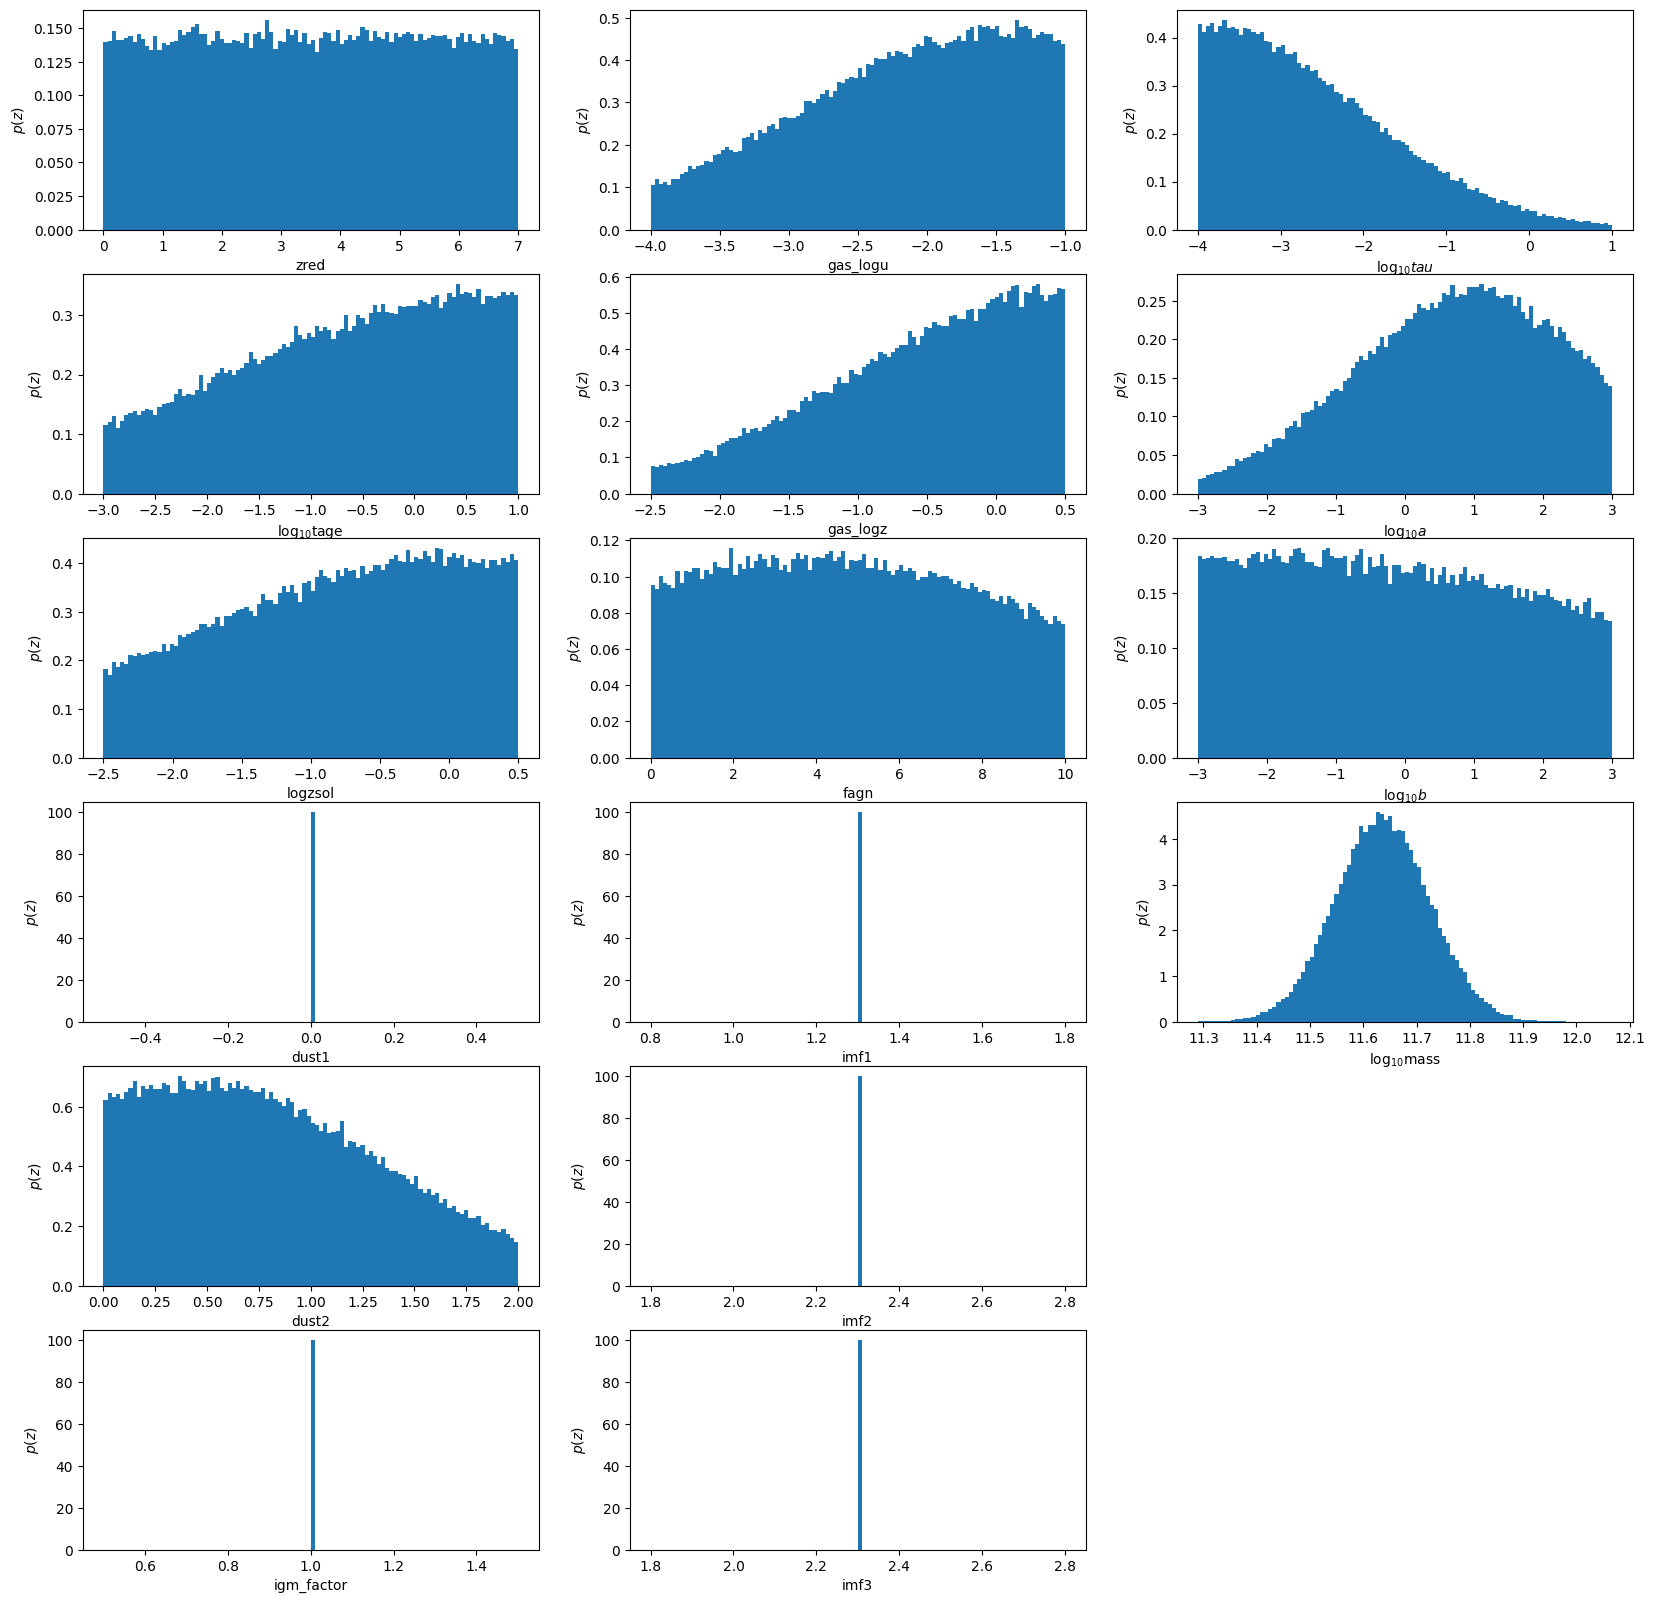

In [5]:
pop.plot_galaxy_population(100000, hparams=data[2], rows=6, nbins=100)